# Data extraction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import uniform
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

In [2]:
df = pd.read_csv("../data/creditcard.csv")

# Preprocessing

## Train/Test split

In [3]:
X = df.drop("Class", axis=1)
y = df["Class"]

In [4]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=11, test_size=0.2, stratify=y)

## Scaling

In [5]:
scaler = preprocessing.StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)    

# Logistic regression

In [ ]:
log_reg = LogisticRegression(solver='liblinear')

params = {
    'class_weight': [
        {0: 1, 1: 25},
        {0: 1, 1: 50},
        {0: 1, 1: 75}
    ],
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=4)  # Search 'C' from a uniform distribution between 0 and 4
}

random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=params,
    scoring='f1',
    n_iter=30,
    cv=5,
    random_state=11
)

random_search.fit(X_train_scaled, y_train)

c:\Users\sahar-rayane\AppData\Local\Programs\Python\Python313\my_env\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sahar-rayane\AppData\Local\Programs\Python\Python313\my_env\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sahar-rayane\AppData\Local\Programs\Python\Python313\my_env\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sahar-rayane\AppData\Local\Programs\Python\Python313\my_env\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sahar-rayane\AppData\Local\Programs\Python\Python313\my_env\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Li

In [14]:
best_model = random_search.best_estimator_
print(best_model)
y_pred = best_model.predict(X_test)

LogisticRegression(C=np.float64(0.05112325836243459),
                   class_weight={0: 1, 1: 25}, solver='liblinear')


c:\Users\sahar-rayane\AppData\Local\Programs\Python\Python313\my_env\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


# Evaluation

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [16]:
cm = confusion_matrix(y_test, y_pred)

In [17]:
recall = cm[1][1] / (cm[1][1] + cm[1][0])
precision = cm[1][1] / (cm[1][1] + cm[0][1])
F1_score= (2*precision*recall)/(precision+recall)

print("Recall:", recall)
print("Precision:", precision)
print("F1_score", F1_score)


Recall: 0.0
Precision: 0.0
F1_score nan


C:\Users\sahar-rayane\AppData\Local\Temp\ipykernel_14040\788679115.py:3: RuntimeWarning: invalid value encountered in scalar divide
  F1_score= (2*precision*recall)/(precision+recall)


In [18]:
y_prob = best_model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, threshold= roc_curve(y_test, y_prob)

auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", auc)

ROC-AUC: 0.9719892001538939


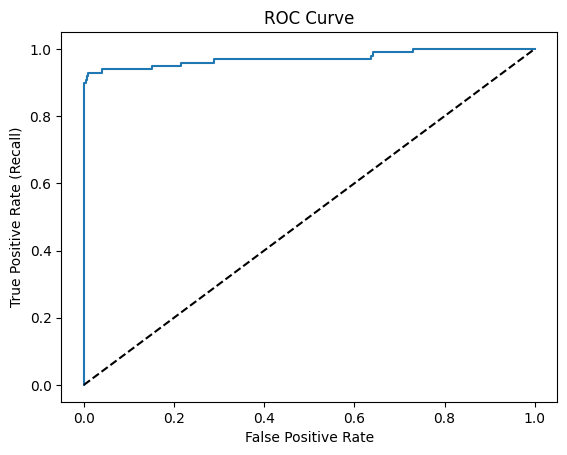

In [19]:
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.show()

## Report

- **Recall = 0.9**: Noticably high. model catches most frauds.
- **Precision = 0.06**: Only 6% of predicted frauds were actually fraud -> operationally expensive
- **F1-score = 0.12**: low because precision is tiny.
- **ROC-AUC = 0.97**: Model is good at recognising fraud vs. normal.

Final note: Logistic regression model is a strong baseline for its high recall and ROC-AUC. Stronger models can probably risen the Precision.